In [6]:
%matplotlib inline

In [7]:
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets

import numpy as np
from matplotlib import pyplot as plt

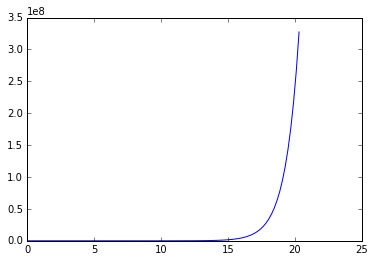

In [8]:
def f(x=10,y=1.0):
    xr = np.linspace(0,x,100)
    plt.plot(xr,np.cosh(xr))
    
interact(f, x=10.0, y=2);

('new params', [1.2040968813506019, 1.5762798934963564, -0.40496828284886943])


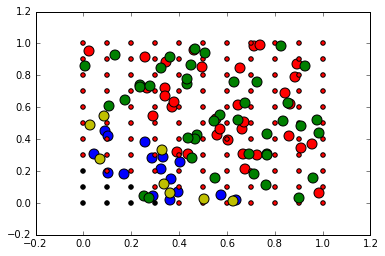

In [9]:
import random

#data
data_count = 100
full_data = [[np.random.uniform(), np.random.uniform()] for x in xrange(data_count)]
for point in full_data:
    x,y = point
    point.append(1 if x+y>0.7 else -1)
    
d = full_data[-data_count/2:]
test_data = full_data[:data_count/2]

#parameters
p = [np.random.ranf()*2. for x in xrange(3)]
dt = 0.1
h = 0.00001

def hypothesis(params,data):
    return params[0]*data[0] + params[1]*data[1] + params[2]

def numerical_gradient(params, data_point):
    gradient = []
    for param in params:
        idx = params.index(param)
        modified_params = list(params)
        modified_params[idx] += h
        g = (hypothesis(modified_params,data_point)-hypothesis(params,data_point))/h
        gradient.append(g)
    return gradient

def apply_gradient(grad,params):
    params+=grad
    
def train(params,train_count=10):
    train_params = list(params)
    for train_idx in xrange(train_count):
        data_point = random.choice(d)
        label = data_point[2]
        hyp = hypothesis(train_params, data_point)
        grad = numerical_gradient(params,data_point)
        if hyp<label:
            train_params = [train_params[i] + dt*grad[i] for i in range(len(train_params))]
        else:
            train_params = [train_params[i] - dt*grad[i] for i in range(len(train_params))]
            
    return train_params

def visualize(train_count=100):
    #plot data points
    for point in d:
        x,y,l = point
        plt.scatter(x,y,c='r' if l==1 else 'b',s=100)

    #learn new parameters
    train_p = list(p)
    new_params = train(train_p,train_count)
    print("new params", new_params)
    
    #plot after learning
    grid_count = 10.0
    grid_points = [[x/grid_count,y/grid_count] for x in xrange(int(grid_count+1)) for y in xrange(int(grid_count+1))]
    for grid_point in grid_points:
        x,y=grid_point
        h = hypothesis(new_params,grid_point)
        color = (1.0 if h > 0 else 0.0, 0.0, 0.0)
        plt.scatter(x,y,c=color)
        
    for point in test_data:
        x,y,l=point
        h = hypothesis(new_params,point)
        correct = False
        if l==-1 and h<0:
            correct = True
        elif l==1 and h>0:
            correct = True
            
        plt.scatter(x,y,c='g' if correct else 'y',s=100)
    
interact(visualize,train_count=(0,300))